In [17]:
from sqlalchemy.engine import create_engine
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [6]:
host='172.24.40.247'
user = 'hv'
password = '123456'
database = 'humanresources'
port = '3306'
# chuoi ket noi
connection_string = "mysql+pymysql://{user}:{password}@{host}:{port}/{database}?charset=UTF8".format(user=user, password=password, host=host, port=port, database=database)

In [7]:
conn = create_engine(connection_string)

In [9]:
df = pd.read_sql('select * from employees', conn)

In [13]:
df['SALARY'].describe()

count      107.000000
mean      6461.831776
std       3909.579731
min       2100.000000
25%       3100.000000
50%       6200.000000
75%       8900.000000
max      24000.000000
Name: SALARY, dtype: float64

In [14]:
import seaborn as sns

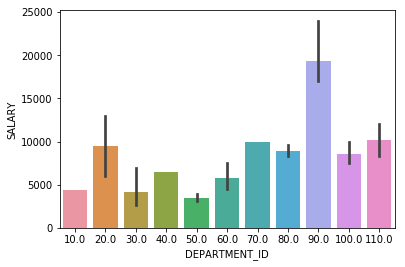

In [18]:
sns.barplot(data=df, x='DEPARTMENT_ID', y='SALARY');

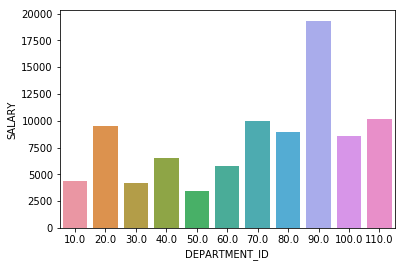

In [19]:
sns.barplot(data=df, x='DEPARTMENT_ID', y='SALARY', ci=None); # confidence interval

In [20]:
sql = '''
SELECT e.*, d.DEPARTMENT_NAME
FROM employees e JOIN departments d ON e.DEPARTMENT_ID=d.DEPARTMENT_ID
'''
df = pd.read_sql(sql, conn)

In [21]:
df.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID,DEPARTMENT_NAME
0,100,Steven,King,SKING,515.123.4567,2003-06-17,AD_PRES,24000.0,NaN,NaN,90,Executive
1,101,Neena,Kochhar,NKOCHHAR,515.123.4568,2005-09-21,AD_VP,17000.0,NaN,100.0,90,Executive
2,102,Lex,De Haan,LDEHAAN,515.123.4569,2001-01-13,AD_VP,17000.0,NaN,100.0,90,Executive
3,103,Alexander,Hunold,AHUNOLD,590.423.4567,2006-01-03,IT_PROG,9000.0,NaN,102.0,60,IT
4,104,Bruce,Ernst,BERNST,590.423.4568,2007-05-21,IT_PROG,6000.0,NaN,103.0,60,IT


In [24]:
import matplotlib.pyplot as plt

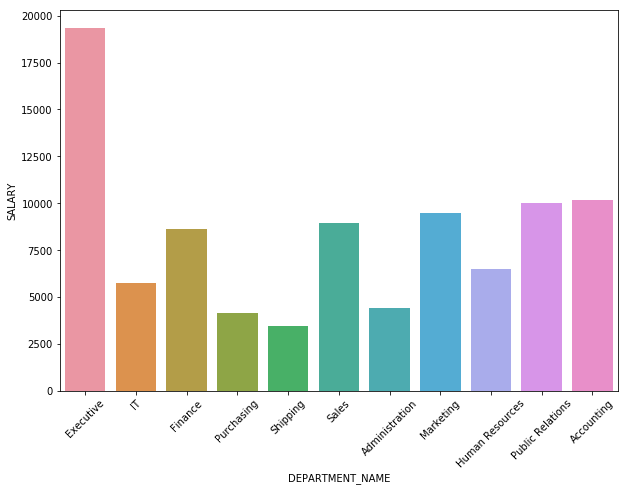

In [29]:
plt.figure(figsize=(10,7))
sns.barplot(data=df, x='DEPARTMENT_NAME', y='SALARY', ci=None)
plt.xticks(rotation=45)
plt.show()